# Quel(s) impact(s) a(ont) eu le(s) confinement(s) sur l’affluence sur Twitch ?

### Analyse de la fréquentation de Twitch dans le temps

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
#import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#import csv
df_game=pd.read_csv(r'.\Twitch_game_data.csv',encoding='cp1252')
df_twitch=pd.read_csv(r'.\Twitch_global_data.csv',encoding='cp1252')
df_twitch

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,480241904,646355,1275257,7701675,20076,"12,149"
1,2016,2,441859897,635769,1308032,7038520,20427,"12,134"
2,2016,3,490669308,660389,1591551,7390957,20271,"12,234"
3,2016,4,377975447,525696,1775120,6869719,16791,"12,282"
4,2016,5,449836631,605432,1438962,7535519,19394,"12,424"
...,...,...,...,...,...,...,...,...
67,2021,8,1974586275,2657585,4778502,20767741,100701,"36,471"
68,2021,9,1857514531,2583469,5599210,18826493,95513,"35,861"
69,2021,10,2020197953,2718974,6086487,18209793,91858,"36,406"
70,2021,11,1812117484,2520330,5941684,17415525,90774,"35,043"


Dans un premier temps nous allons regarder entre 2016 et 2021 la Moyenne de spectateurs sur la totalité de la plateforme afin de determiner dans quelle(s) période(s) il y a eu le plus grand nombre de spectateurs.

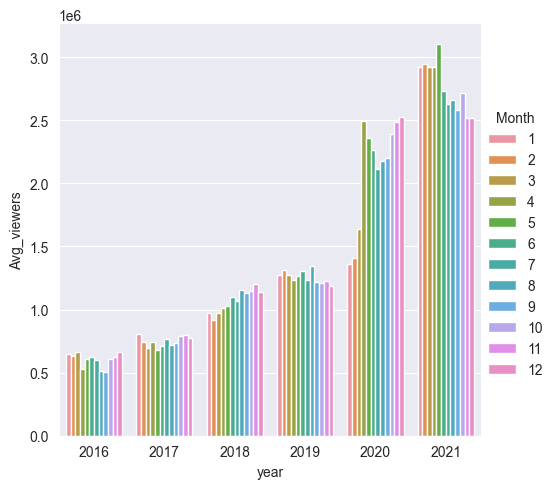

In [23]:
sb.catplot(data=df_twitch, x="year", y="Avg_viewers", hue='Month',kind='bar')


On voit donc qu'entre 2016 et 2019 la plateforme se developpe progressivement avec une croissance qui se fait de facon assez constante.
Puis dès avril 2020, on voit un gros pique qui se réduit aux alentours des vacances d'été avant de remonter distinctement dès octobre 2020 et particulièrement 1er janvier 2021

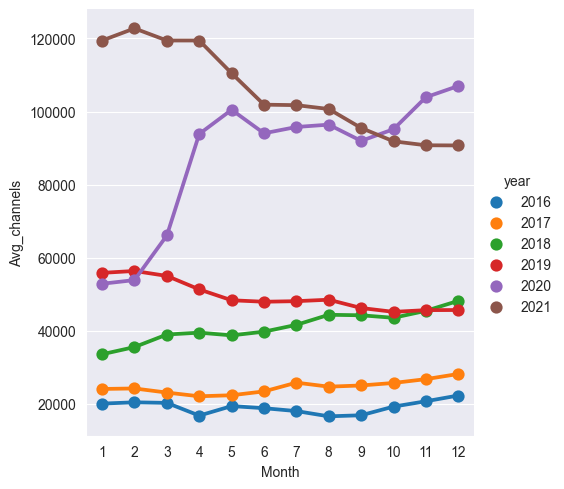

In [38]:
sb.catplot(data=df_twitch, x="Month", y="Avg_channels", hue='year',kind='point')


En consultant la courbe de la moyenne de chaines, on peut confirmer qu'à partir d'avril 2020 le temps de visionnage sur la plateforme est en forte hausse. Nous allons regarder quels sont les jeux qui ont été streams le plus durant cette période et ce que le confinent a eu comme effet dessus.

### Analyse de l'évolution des jeux stream entre 2016 et 2021

In [25]:
df_game

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
14395,196,Garry's Mod,12,2021,630902,21753 hours,24951,99,3537,849,29,29.00
14396,197,Call of Duty: Black Ops Cold War,12,2021,622497,223641 hours,26559,654,25366,837,300,2.78
14397,198,Noita,12,2021,620983,13935 hours,27826,41,1961,835,18,44.56
14398,199,Pro Soccer Online,12,2021,619859,606 hours,36182,20,84,834,0,1022.87


In [37]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              14400 non-null  int64  
 1   Game              14399 non-null  object 
 2   Month             14400 non-null  int64  
 3   Year              14400 non-null  int64  
 4   Hours_watched     14400 non-null  int64  
 5   Hours_Streamed    14400 non-null  object 
 6   Peak_viewers      14400 non-null  int64  
 7   Peak_channels     14400 non-null  int64  
 8   Streamers         14400 non-null  int64  
 9   Avg_viewers       14400 non-null  int64  
 10  Avg_channels      14400 non-null  int64  
 11  Avg_viewer_ratio  14400 non-null  float64
dtypes: float64(1), int64(9), object(2)
memory usage: 1.3+ MB


Le Dataset presente le top 200 des meilleurs jeux qui ont été stream par mois du 1er janvier au 31 décembre 2021. Le problème que cela peut présenter est la grande quantité de données que cela donne, car j'ai l'evolution de 200 jeux par mois pendant 6 ans, et a chaque mois j'ai un jeu ou plusieurs jeux qui peuvent monter comme descendre dans le classement et donc apparaître ou disparaître.

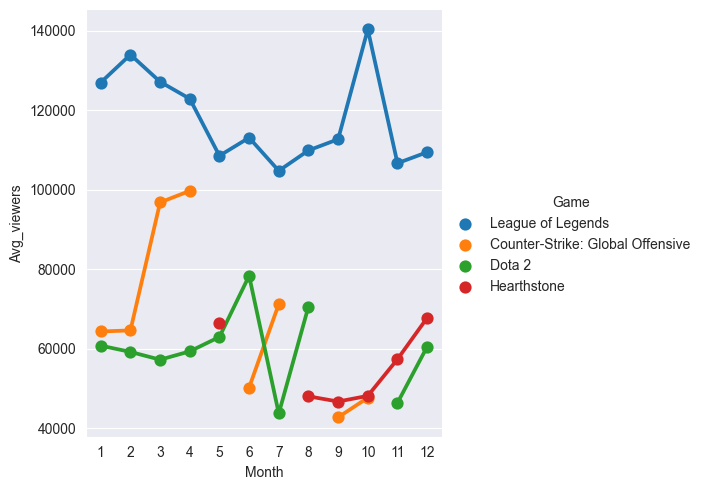

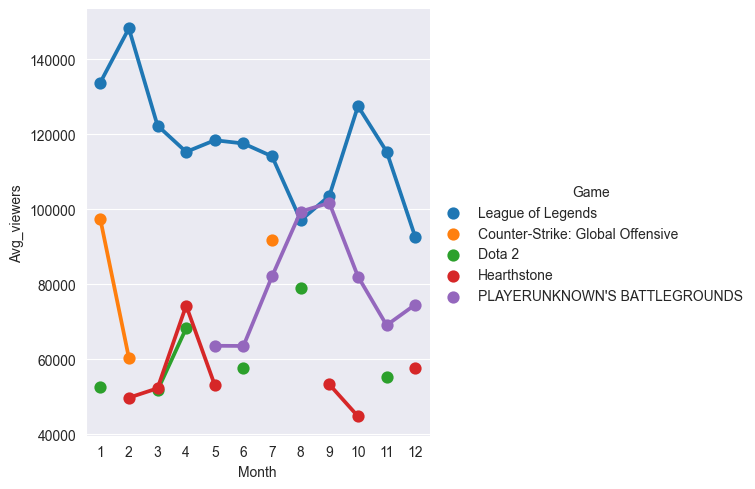

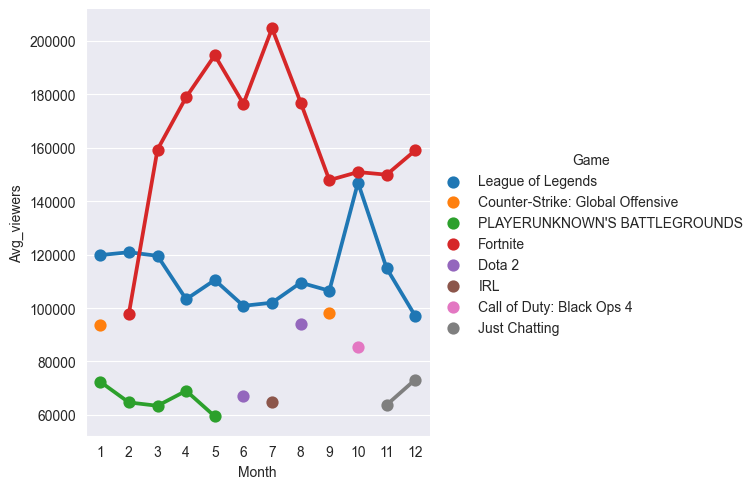

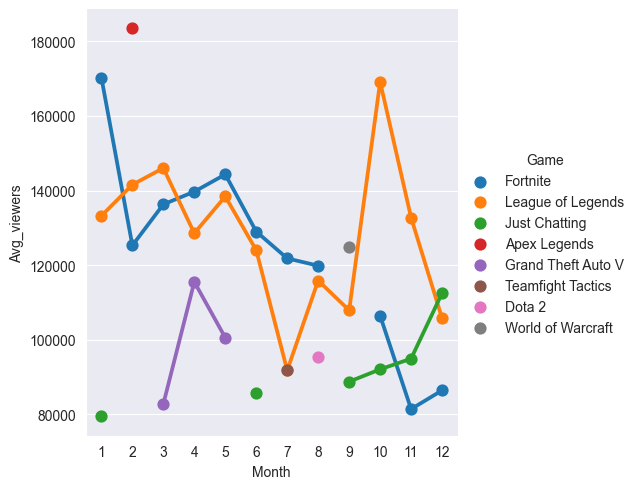

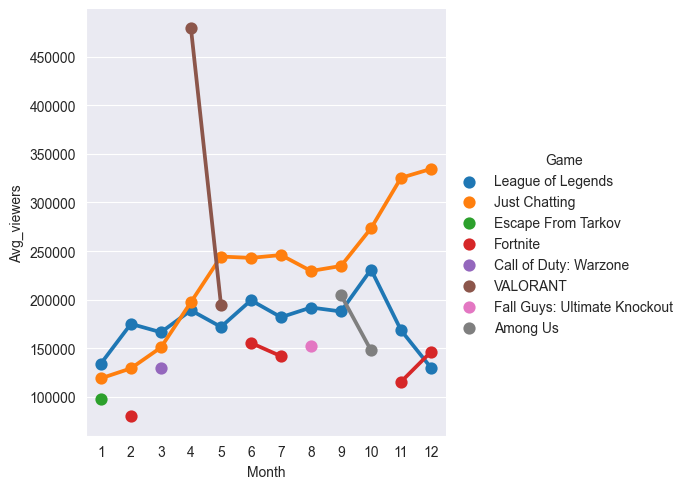

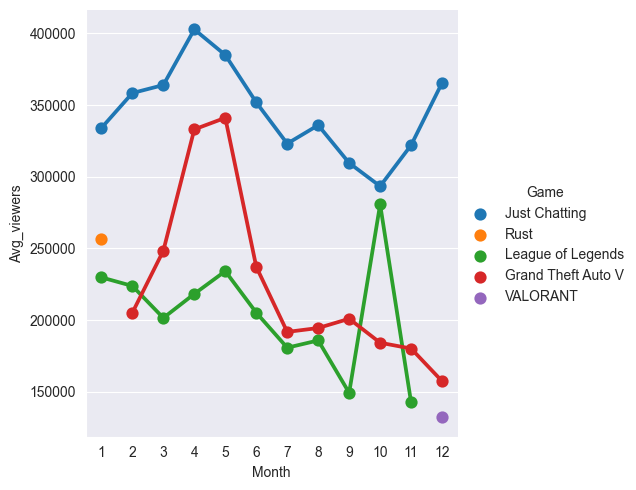

In [29]:
sb.catplot(data=df_game.query("Rank<=3 and Year==2016"),x="Month", y="Avg_viewers", hue='Game',kind="point")
sb.catplot(data=df_game.query("Rank<=3 and Year==2017"),x="Month", y="Avg_viewers", hue='Game',kind="point")
sb.catplot(data=df_game.query("Rank<=3 and Year==2018"),x="Month", y="Avg_viewers", hue='Game',kind="point")
sb.catplot(data=df_game.query("Rank<=3 and Year==2019"),x="Month", y="Avg_viewers", hue='Game',kind="point")
sb.catplot(data=df_game.query("Rank<=3 and Year==2020"),x="Month", y="Avg_viewers", hue='Game',kind="point")
sb.catplot(data=df_game.query("Rank<=3 and Year==2021"),x="Month", y="Avg_viewers", hue='Game',kind="point")



J'ai donc regardé la moyenne de spectateur sur les 3 meilleurs "jeux" par mois durant les 6 différentes années. On remarque qu'entre 2016 et 2021, les jeux League of Legends, Counter-Strike, Dota 2 sont présents, ce qui montre que les jeux collectifs semblent attirer de nombreux spectateurs. Ce qui ressort particulièrement à partir de la fin 2019 et durant les deux années 2020 et 2021, c'est la démocratisation du 'just chatting' qui a fait une montée en flèche, cela peut s'expliquer par le besoin de partager avec des internautes ou tout simplement d'autres personnes sur des sujets divers et variés.

On va donc s'intéresser à la quantité de chaines qui diffusées à partir de 2020 et en 2021 sur le "Just Chatting" :

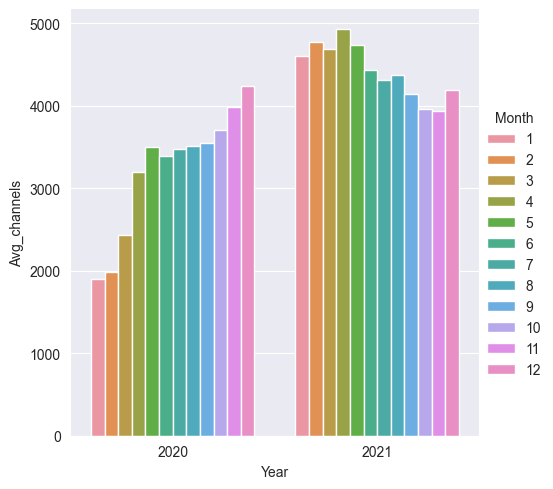

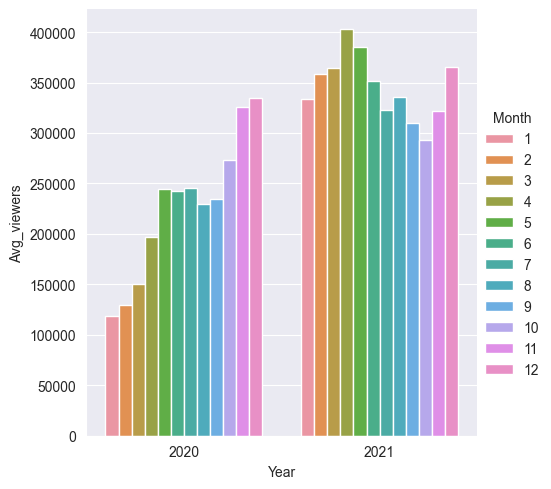

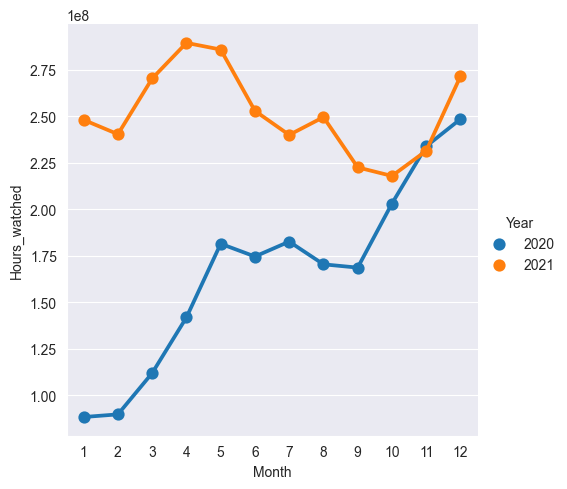

In [39]:
sb.catplot(data=df_game.query("Game=='Just Chatting' and Year==2020 or Game=='Just Chatting' and Year==2021"),x="Year", y="Avg_channels", hue='Month',kind="bar")
sb.catplot(data=df_game.query("Game=='Just Chatting' and Year==2020 or Game=='Just Chatting' and Year==2021"),x="Year", y="Avg_viewers", hue='Month',kind="bar")
sb.catplot(data=df_game.query("Game=='Just Chatting' and Year==2020 or Game=='Just Chatting' and Year==2021"),x="Month", y="Hours_watched", hue='Year',kind="point")

On remarque que le nombre de chaines qui ont diffusés du "Just Chatting" est en hausse et le nombre moyen de spectateur suit la même évolution. J'ai alors consulté la moyenne des heures de visionnages des spectateurs et on peut voir une forte hausse entre février 2020 et avril 2020 puis septembre 2020 à janvier 2021.